#Basketball Shot Form recognition model

The goal of this model is to determine from a picture, which kind of shot form a basket-ball player is taking.  To train this model we're going to use the fast ai library. We build our own database from scratch.

## Environnement Set UP

Let's set up our working environnement with fast ai librairy

In [0]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   321  100   321    0     0   1725      0 --:--:-- --:--:-- --:--:--  1725
Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'


Mounted at /content/gdrive


In [0]:
from fastai import *
from fastai.vision import *

## Building  our Dataset 

Now we are going to build our database. We need to scrap some data from Google Image. We'll try to recognize 5 kind of shot form :  

*   Jump Shot;
*   Hook Shot;
*   Dunk;
*   Fade Away;
*   Lay up

To build the data this database retrieve URL of picture label with the desire shot. 

In our server we create the need folder for the images and a CSV file.

PS : You can't run this code in one go. For each folder you need to create a folder, than set a path and download the image. You can also create a proper loop if you want too.

In [0]:
folder = 'jump_shot'
file = 'urls_jump_shot.csv'

In [0]:
folder = 'hook_shot'
file = 'urls_hook_shot.csv'

In [0]:
folder = 'dunk'
file = 'urls_dunk.csv'

In [0]:
folder = 'fade_away'
file = 'urls_fade_away.csv'

In [0]:
folder = 'lay_up'
file = 'urls_lay_up.csv'

In [0]:
path = Path(base_dir + 'data/basketball_form_shot')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/basketball_form_shot/jump_shot'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/basketball_form_shot/hook_shot'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/basketball_form_shot/dunk'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/basketball_form_shot/fade_away'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/basketball_form_shot/lay_up'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/basketball_form_shot/models')]

In [0]:
classes = ['jump_shot','hook-shot','dunk','fade_away','lay_up']

We use a function from the fast ai librairy to download the images needed.

In [0]:
download_images(path/'lay_up'/'lay-up.txt', dest, max_pics=200)

In [0]:
help(download_images)

Help on function download_images in module fastai.vision.data:

download_images(urls:Collection[str], dest:Union[pathlib.Path, str], max_pics:int=1000, max_workers:int=8, timeout=4)
    Download images listed in text file `urls` to path `dest`, at most `max_pics`



With this loop we're deleting every picture which we can't open.

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
bs = 64

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224,bs=bs//2, num_workers=4).normalize(imagenet_stats)

## View Data

In [0]:
data.classes

['dunk', 'fade_away', 'hook_shot', 'jump_shot', 'lay_up']

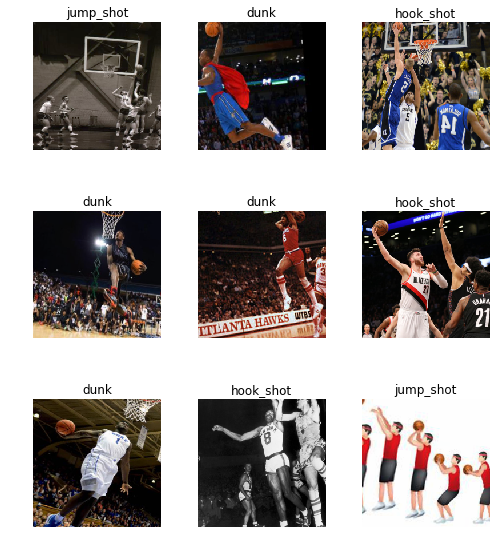

In [0]:
data.show_batch(rows=3, figsize=(7,8))

## Training 

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.884078,1.309243,0.531746,00:14
1,1.587650,1.275619,0.468254,00:14
2,1.380407,1.359379,0.492063,00:14
3,1.217557,1.371754,0.484127,00:15
4,1.066587,1.335629,0.436508,00:15
5,0.944593,1.272710,0.404762,00:15
6,0.850047,1.217015,0.396825,00:15
7,0.789582,1.214964,0.412698,00:15


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


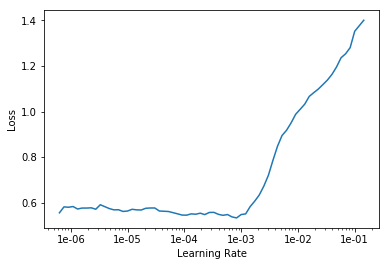

In [0]:
learn.recorder.plot()


In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-06,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.568896,1.175203,0.380952,00:15
1,0.595781,1.196375,0.373016,00:16


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

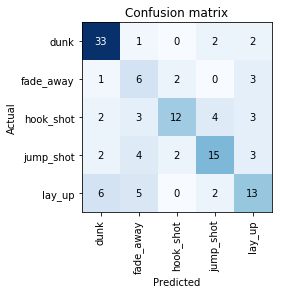

In [0]:
interp.plot_confusion_matrix()

Our model don't perform very well for now. I personnaly think that we don't have enough data. Plus, it's can be trick to distinct fade_away from jump shot. This result proof that we have a good challenge here.


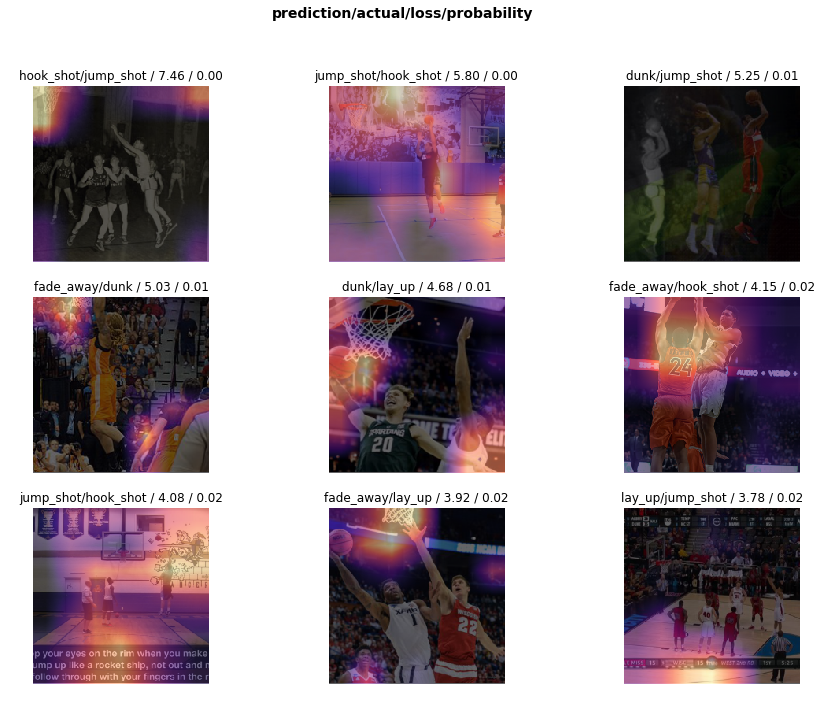

In [0]:
interp.plot_top_losses(9, figsize=(15,11))
